In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indonesian-twitter-emotion/Twitter_Emotion_Dataset.csv
/kaggle/input/indonesian-twitter-emotion/kamus_singkatan.csv


Mengimport numpy dan pandas library, dan kemudian menunjukkan cara membaca file dari direktori input di Kaggle

In [2]:
from collections import Counter
import nltk
import re
import string

Mengimport modul-modul Python yang berguna untuk melakukan pemrosesan teks dan analisis bahasa natural.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [5]:
df = pd.read_csv("../input/indonesian-twitter-emotion/Twitter_Emotion_Dataset.csv")

In [6]:
df

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."
...,...,...
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan m..."
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di ...
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana ..."
4399,happy,[USERNAME] dulu beneran ada mahasiswa Teknik U...


#EDA

In [7]:
df.columns

Index(['label', 'tweet'], dtype='object')

In [8]:
df.shape

(4401, 2)

In [9]:
#no nuls value
df.isnull().sum().sum()

0

In [10]:
df.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


In [11]:
temp = df.groupby('label').count()['tweet'].reset_index().sort_values(by='tweet', ascending=False)
temp.style.background_gradient(cmap='Purples')

,label,tweet
0,anger,1101
2,happy,1017
4,sadness,997
1,fear,649
3,love,637


Kode di atas mengelompokkan tweet berdasarkan label emosi yang terdapat pada dataframe df, kemudian menghitung jumlah tweet pada setiap kelompok dan menyimpannya dalam kolom tweet. Selanjutnya, hasil pengelompokan dan penghitungan tersebut diurutkan berdasarkan jumlah tweet secara menurun.

Kemudian, temp.style.background_gradient(cmap='Purples') digunakan untuk memberikan warna latar belakang pada hasil pengurutan tersebut, dengan skala warna yang diberikan adalah "Purples". Warna latar belakang yang lebih gelap menunjukkan nilai yang lebih tinggi. Hasil tersebut ditampilkan dalam bentuk tabel.

<AxesSubplot:xlabel='label', ylabel='count'>

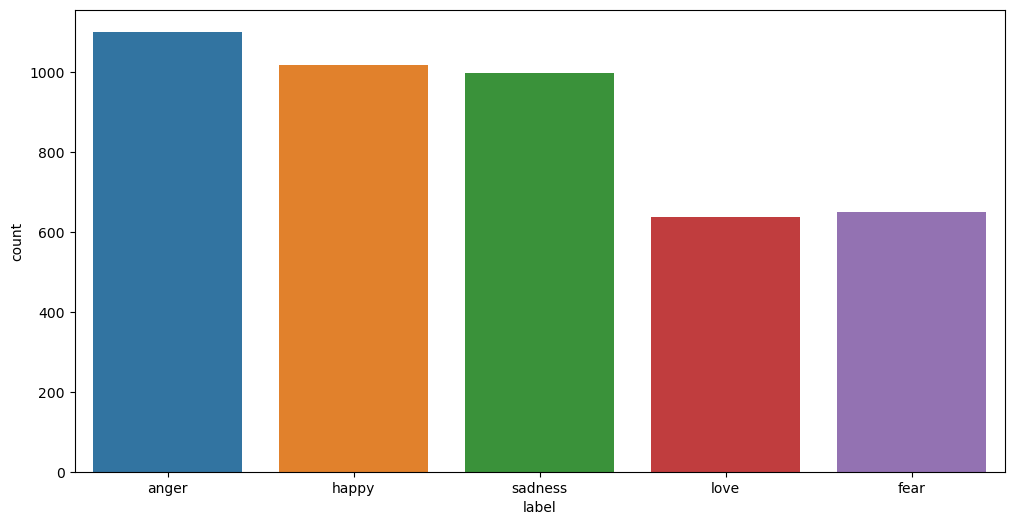

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='label', data=df)

Kode di atas digunakan untuk membuat visualisasi grafik dengan menggunakan library seaborn. Lebih tepatnya, kode tersebut digunakan untuk membuat sebuah bar plot yang menunjukkan jumlah tweet pada setiap label emosi yang terdapat pada dataframe df.

plt.figure(figsize=(12,6)) digunakan untuk menentukan ukuran dari grafik yang akan dibuat.

sns.countplot(x='label', data=df) digunakan untuk membuat bar plot dengan sumbu x diisi dengan kolom 'label' pada dataframe df. Nilai pada sumbu y akan menunjukkan jumlah tweet pada setiap label emosi.

In [13]:
fig=go.Figure(go.Funnelarea(
    text=temp.label,
    values=temp.tweet,
    title= {"position":"top center", "text": "Funnel-chart on Case Number Distribution"}))
fig.show()

Membuat funnel chart atau diagram funnel yang menunjukkan distribusi jumlah kasus pada setiap label emosi pada dataset yang diberikan. Pada kode tersebut, terlebih dahulu dilakukan penghitungan jumlah tweet pada setiap label dengan menggunakan fungsi groupby dan count pada pandas dataframe. Kemudian, hasil penghitungan tersebut ditampilkan dalam bentuk diagram funnel menggunakan package plotly.graph_objects. Diagram funnel digunakan untuk memvisualisasikan data secara hierarkis, di mana setiap tingkat menunjukkan jumlah data yang semakin mengecil dari atas ke bawah. Pada kode tersebut, label emosi ditampilkan di bagian atas diagram, sedangkan tingkat di bawahnya menunjukkan jumlah tweet yang terkait dengan label tersebut.

**Most Common Word**

In [14]:
df['temp']= df['tweet'].apply(lambda x: str(x).split())
top= Counter([item for sublist in df['temp'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns=["Common_words", 'count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,[USERNAME],1754
1,yg,1607
2,yang,1572
3,dan,1527
4,di,1518
5,aku,894
6,itu,841
7,ada,840
8,ini,747
9,sama,692


Membuat dataframe baru 'temp' yang berisi kata-kata yang paling umum muncul dalam tweet. Pertama, kolom 'temp' ditambahkan ke dataframe 'df' dengan menggunakan fungsi lambda untuk membagi setiap tweet menjadi daftar kata-kata. Kemudian, sebuah Counter dibuat untuk menghitung frekuensi setiap kata di dalam daftar tersebut. 20 kata yang paling sering muncul kemudian dipilih dan ditampilkan dalam bentuk dataframe baru 'temp' dengan dua kolom: 'Common_words' dan 'count'. Akhirnya, background gradient dari dataframe 'temp' diatur agar berwarna biru (cmap='Blues').

In [15]:
fig = px.treemap(temp, path=['Common_words'], values='count', title='Tree of Most Common words')
fig.show()

Membuat sebuah treemap yang menampilkan 20 kata yang paling umum muncul dalam tweet. Treemap adalah sebuah visualisasi hierarkis yang menampilkan data dalam bentuk kotak-kotak yang saling bersarang, dan ukuran kotak menunjukkan besarnya proporsi nilai pada data. Pada kasus ini, setiap kotak pada treemap menunjukkan sebuah kata yang muncul dalam tweet, dan ukuran kotak menunjukkan seberapa sering kata tersebut muncul. Semakin besar kotak, semakin sering kata tersebut muncul dalam tweet. Pada treemap ini, kata-kata yang paling sering muncul ditampilkan pada kotak yang lebih besar.

In [16]:
fig = px.bar(temp,x="count", y="Common_words", 
             title="Common words in Selected Text", orientation='h', width=700, height=700,color='Common_words')
fig.show()

Grafik bar di atas menampilkan 20 kata yang paling umum muncul pada tweet. Sumbu X menunjukkan jumlah kemunculan kata-kata tersebut, sementara sumbu Y menunjukkan kata-kata tersebut. Setiap batang berwarna-warni merepresentasikan masing-masing kata. Semakin tinggi batang, semakin sering kata tersebut muncul dalam tweet.

In [17]:
most_popular_case = df[df['label']=="anger"]

Melakukan filter data frame df dengan hanya mengambil baris-baris yang memiliki label "anger" pada kolom "label", dan menyimpannya ke dalam variabel most_popular_case.

In [18]:
#MosT common  words in 
top = Counter([item for sublist in most_popular_case['temp'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,[USERNAME],832
1,yg,543
2,di,412
3,dan,326
4,yang,281
5,ga,253
6,itu,239
7,ada,233
8,mau,172
9,ini,171


Mencari kata-kata yang paling umum (most common) dalam tweet yang dikategorikan sebagai "anger".

In [19]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words popular cases Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

Grafik diatas menunjukkan 20 kata yang paling umum digunakan dalam tweet yang termasuk dalam kategori kemarahan (anger). Setiap baris pada grafik menunjukkan kata yang paling umum digunakan dan jumlah kali kata tersebut muncul dalam tweet. Semakin tinggi bar, semakin banyak kata tersebut digunakan dalam tweet yang termasuk dalam kategori kemarahan. Grafik ini memberikan informasi tentang kata-kata yang paling sering digunakan dalam tweet yang termasuk dalam kategori kemarahan, yang dapat memberikan wawasan tentang topik atau isu yang memicu kemarahan pada orang-orang.

In [20]:
# if n_words=1 -> unigrams, if n_words=2 -> bigrams..
def get_top_Nwords(corpus, n=None, remove_stop_words=False, n_words=1):
    if remove_stop_words:
        vec = CountVectorizer(stop_words='english', ngram_range=(n_words, n_words)).fit(corpus)
    else:
        vec = CountVectorizer(ngram_range=(n_words, n_words)).fit(corpus)
    
    bag_ofWords =vec.transform(corpus)
    sum_words = bag_ofWords.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

Fungsi get_top_Nwords yang ada pada kode diatas digunakan untuk mengembalikan daftar kata-kata yang paling sering muncul dalam dokumen atau korpus. Jumlah kata-kata yang ingin ditampilkan dapat diatur dengan parameter n. Jika ingin menghilangkan stop words, set parameter remove_stop_words=True. Jika ingin mencari kata-kata yang terdiri dari dua kata (bigram), atur parameter n_words=2. Fungsi ini menggunakan CountVectorizer dari library sklearn untuk membuat representasi bag-of-words dari teks.

**Bigram Distribution**

In [21]:
common_words = get_top_Nwords(df['tweet'].drop_duplicates(), 20, remove_stop_words=True, n_words=2)
for word, freq in common_words:
    print(word, freq)

username username 634
ada yang 91
ada yg 87
orang yang 86
jatuh cinta 78
hari ini 68
username url 65
orang lain 65
orang yg 58
terima kasih 58
apa yang 55
ga ada 53
ya allah 53
aku sayang 45
ga bisa 43
salah satu 42
sayang banget 41
orang orang 40
ada di 36
saat ini 36


Melakukan penghitungan kata-kata yang paling sering muncul pada dataset tweet yang ada.

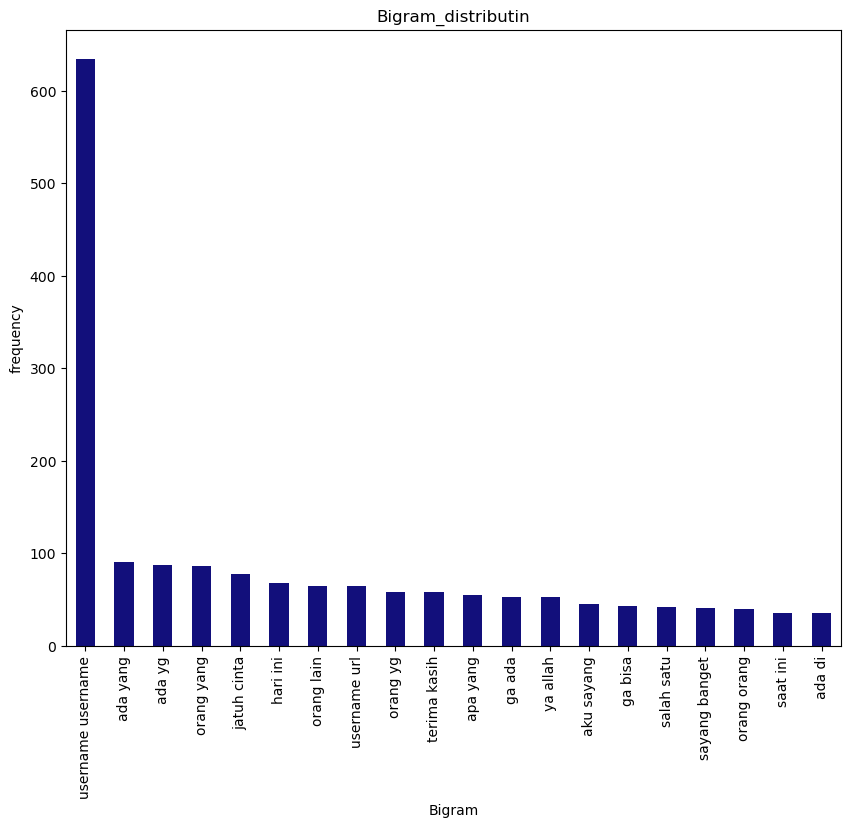

In [22]:
train_temp =pd.DataFrame(common_words, columns=['text', 'count'])
fig = plt.figure(figsize=(10,8))
ax1 = train_temp.groupby('text').sum()['count'].sort_values(ascending=False).plot(kind='bar',
                                                                            color='#120f7b')
ax1.set_title("Bigram_distributin")
ax1.set_xlabel('Bigram')
ax1.set_ylabel("frequency")
plt.show()

Menunjukkan grafik batang untuk distribusi bigram dari data tweet yang diambil dari dataset.

In [23]:
common_words = get_top_Nwords(df['tweet'].drop_duplicates(), 20, remove_stop_words=True, n_words=3)
for word, freq in common_words:
    print(word, freq)

username username username 329
username username url 27
sayang banget sama 21
aku cinta kamu 20
selamat ulang tahun 16
aku sayang kamu 15
kamu aku cinta 15
cinta kamu aku 15
kepada allaah swt 13
aku berlindung kepada 12
berlindung kepada allaah 12
tidak ada yang 11
pada saat itu 11
yang ada di 11
stiap rmh sakit 11
satu sama lain 10
allaah swt dari 10
swt dari godaan 10
dari godaan setan 10
godaan setan yang 10


**Trigram distribution**

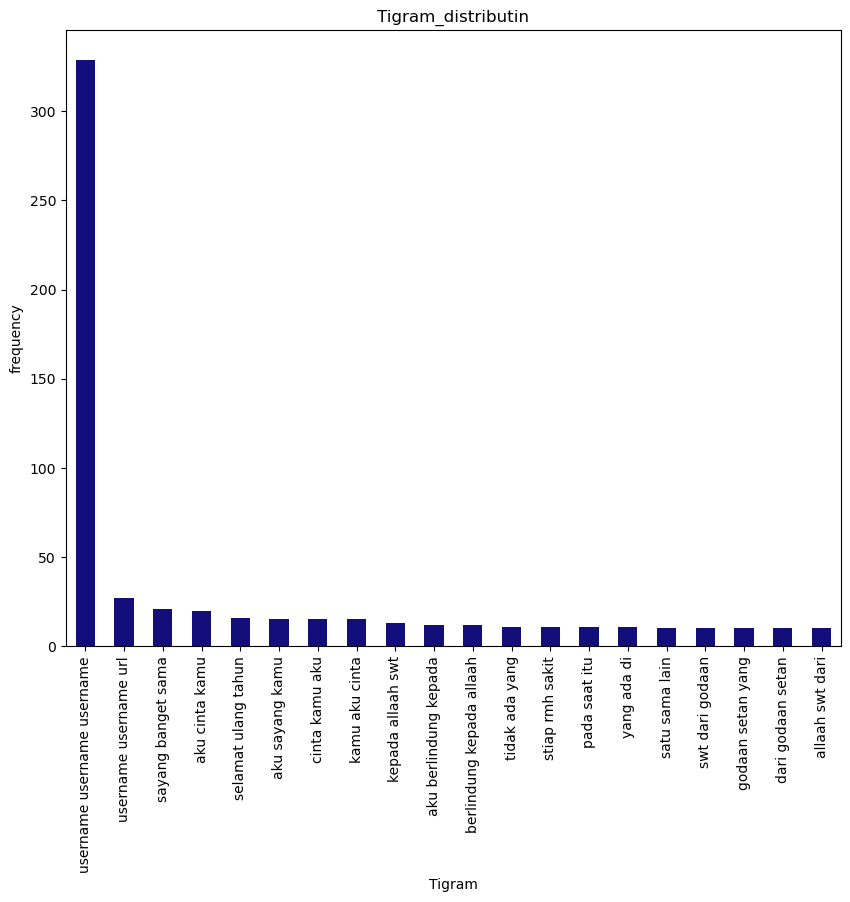

In [24]:
train_temp =pd.DataFrame(common_words, columns=['text', 'count'])
fig = plt.figure(figsize=(10,8))
ax1 = train_temp.groupby('text').sum()['count'].sort_values(ascending=False).plot(kind='bar',
                                                                            color='#120f7b')
ax1.set_title("Tigram_distributin")
ax1.set_xlabel('Tigram')
ax1.set_ylabel("frequency")
plt.show()

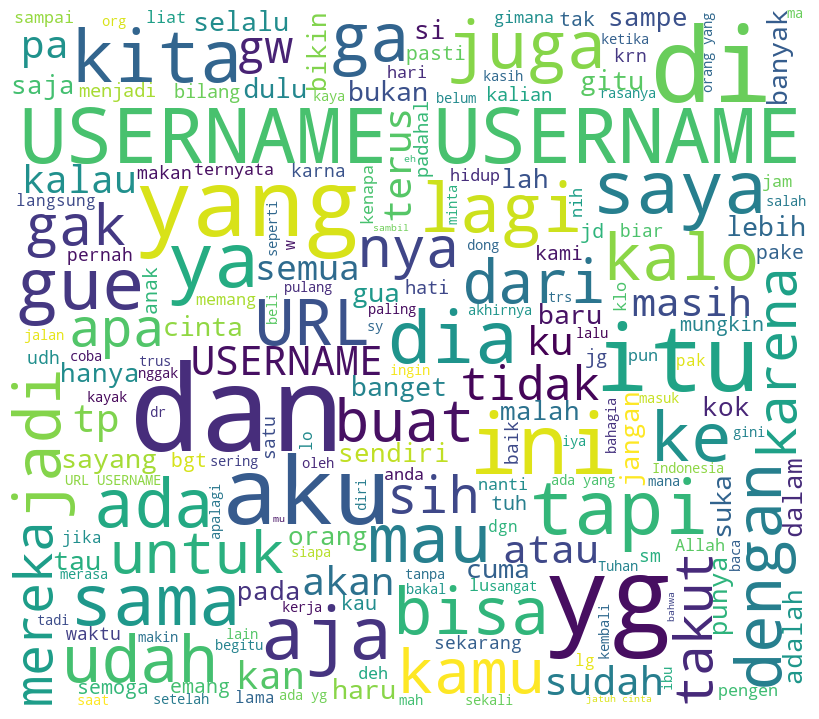

In [25]:
stopwords=set(STOPWORDS)
wordclouds=WordCloud(width=800, 
                    height=700,
                    background_color='white',
                    max_font_size=120,
                    min_font_size=10,
                    stopwords=stopwords).generate(''.join(df['tweet']))

#plot the worldcloud image
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordclouds)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**Preprocessing**

In [26]:
df['tweet'] = " " + df['tweet'] + " "

In [27]:
import pandas as pd

# Membaca file CSV dan menyimpannya ke dalam dataframe
df = pd.read_csv("/kaggle/input/indonesian-twitter-emotion/Twitter_Emotion_Dataset.csv")

# Membersihkan tweet dari karakter-karakter yang tidak diperlukan
df['tweet'] = df['tweet'].str.replace(r"((\\x[a-z0-9]{1,}){1,})", "", regex=False)
df['tweet'] = df['tweet'].str.replace("USERNAME", "", regex=False)
df['tweet'] = df['tweet'].str.replace(r"http\S+", "", regex=False)
df['tweet'] = df['tweet'].str.replace("URL", "", regex=False)
df['tweet'] = df['tweet'].str.replace('@[^\s]+', "", regex=False)
df['tweet'] = df['tweet'].str.replace(r'#([^\s]+)', "", regex=False)
df['tweet'] = df['tweet'].str.replace(r"\\n", " ", regex=False)
df['tweet'] = df['tweet'].str.replace("SENSITIVE-NO", "", regex=False)
df['tweet'] = df['tweet'].str.replace("askmf", "", regex=False)

# Menampilkan lima baris pertama dari dataframe
print(df.head())


   label                                              tweet
0  anger  Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...
1  anger  Sesama cewe lho (kayaknya), harusnya bisa lebi...
2  happy  Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3  anger  Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...
4  happy  Sharing pengalaman aja, kemarin jam 18.00 bata...


In [28]:
#Menghapus tanda baca
df['tweet'] = df['tweet'].str.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
#Menghapus angka
df['tweet'] = df['tweet'].replace(regex='\d+', value='')
#lowercase
df['tweet'] = df['tweet'].str.lower()

**Feature Extraction**

In [30]:
X = df['tweet']
y = df['label'].values

In [31]:
#text = df['processed']
count_vect = CountVectorizer()
X_count = count_vect.fit_transform(X)

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_count)

**Building Model**

In [32]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(multi_class='multinomial', penalty='l2', solver='newton-cg', C= 1.623776739188721)
classifier.fit(X_tfidf, y)

LogisticRegression(C=1.623776739188721, multi_class='multinomial',
                   solver='newton-cg')

In [33]:
from sklearn.model_selection import cross_val_predict
predLR = cross_val_predict(estimator = classifier, X = X_tfidf, y = y, cv = 10)

In [34]:
from sklearn.metrics import confusion_matrix
conf_mat2 = confusion_matrix(y, predLR)
conf_mat2

array([[859,  20,  87,   4, 131],
       [116, 368,  66,  16,  83],
       [127,  13, 677,  32, 168],
       [ 28,  11,  80, 430,  88],
       [229,  24, 174,  49, 521]])

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y, predLR))

              precision    recall  f1-score   support

       anger       0.63      0.78      0.70      1101
        fear       0.84      0.57      0.68       649
       happy       0.62      0.67      0.64      1017
        love       0.81      0.68      0.74       637
     sadness       0.53      0.52      0.52       997

    accuracy                           0.65      4401
   macro avg       0.69      0.64      0.66      4401
weighted avg       0.66      0.65      0.65      4401



In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, leaf_size=1, n_jobs= -1, weights= 'distance')
knn.fit(X_tfidf, y)

KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=10, weights='distance')

In [37]:
predKNN = cross_val_predict(estimator = knn, X = X_tfidf, y = y, cv = 10)

In [38]:
conf_mat = confusion_matrix(y, predKNN)

In [39]:
conf_mat

array([[645,  87,  84, 125, 160],
       [114, 280,  46,  88, 121],
       [143,  69, 415, 191, 199],
       [ 23,  16,  38, 496,  64],
       [202,  93, 130, 225, 347]])

In [40]:
print(classification_report(y, predKNN))

              precision    recall  f1-score   support

       anger       0.57      0.59      0.58      1101
        fear       0.51      0.43      0.47       649
       happy       0.58      0.41      0.48      1017
        love       0.44      0.78      0.56       637
     sadness       0.39      0.35      0.37       997

    accuracy                           0.50      4401
   macro avg       0.50      0.51      0.49      4401
weighted avg       0.51      0.50      0.49      4401



In [41]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(X_tfidf, y)

MultinomialNB()

In [42]:
predNB = cross_val_predict(estimator = clf, X = X_tfidf, y = y, cv = 10)
conf_matNB = confusion_matrix(y, predNB)

In [43]:
print(classification_report(y, predNB))

              precision    recall  f1-score   support

       anger       0.53      0.87      0.66      1101
        fear       0.96      0.15      0.27       649
       happy       0.66      0.55      0.60      1017
        love       0.90      0.33      0.48       637
     sadness       0.43      0.61      0.51       997

    accuracy                           0.55      4401
   macro avg       0.70      0.50      0.50      4401
weighted avg       0.66      0.55      0.53      4401



In [44]:
from sklearn.svm import SVC
svm=SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm.fit(X_tfidf, y)

SVC(gamma='auto', kernel='linear')

In [45]:
svmPred = cross_val_predict(estimator = svm, X = X_tfidf, y = y, cv = 10)

In [46]:
conf_matSVM = confusion_matrix(y, svmPred)

In [47]:
print(classification_report(y, svmPred))

              precision    recall  f1-score   support

       anger       0.64      0.75      0.69      1101
        fear       0.88      0.57      0.69       649
       happy       0.62      0.64      0.63      1017
        love       0.80      0.69      0.74       637
     sadness       0.50      0.54      0.52       997

    accuracy                           0.64      4401
   macro avg       0.69      0.64      0.65      4401
weighted avg       0.66      0.64      0.64      4401

